## Airline Safety Clustering

With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

Should travelers avoid airlines that have had crashes in the past? The dataset for this has been sourced from Aviation Safety Network and available at this link: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-airline-safety-dataset

#### Dataset Attributes

airline: Airline (asterisk indicates that regional subsidiaries are included)

avail_seat_km_per_week: Available seat kilometers flew every week

incidents_85_99: Total number of incidents, 1985–1999

fatal_accidents_85_99: Total number of fatal accidents, 1985–1999

fatalities_85_99: Total number of fatalities, 1985–1999

incidents_00_14: Total number of incidents, 2000–2014

fatal_accidents_00_14: Total number of fatal accidents, 2000–2014

fatalities_00_14: Total number of fatalities, 2000–2014

### KMeans and Agglomerative Clustering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv(r"C:\Users\stlp\Downloads\airline-safety.csv")

In [9]:
print(df.shape)
df.head()

(56, 8)


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [40]:
# preprocessing
data = df.drop('airline', axis = 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### KMeans

In [24]:
# k means clustering and scoring fucntion
# evaluates model performance based on euclidean distance for each k
# returns list of models and model scores
def kmeans_model_eval(data, k_range):
    # models & scoring 
    fits = []
    scores = []
    
    for k in k_range:
        model = KMeans(n_clusters = k, random_state = 16, n_init = 'auto').fit(data)
        fits.append(model)
    
        model_score = silhouette_score(data, model.labels_, metric = 'euclidean')
        scores.append(model_score)

    return fits, scores

In [20]:
# range 2 - 9
# 2: safe vs unsafe
# 8: default k for sklearn
k_range = list(range(2,9))
kmeans_fits, kmeans_scores = kmeans_model_eval(data_scaled, k_range)

C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stlp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

#### Agglomerative

In [30]:
# agglomerative clustering and scoring fucntion
# evaluates model performance based on euclidean distance for each k
# returns list of models and model scores
def agglo_model_eval(data, k_range):
    # models & scoring 
    fits = []
    scores = []
    
    for k in k_range:
        model = AgglomerativeClustering(n_clusters = k).fit(data)
        fits.append(model)
    
        model_score = silhouette_score(data, model.labels_, metric = 'euclidean')
        scores.append(model_score)

    return fits, scores

In [32]:
agglo_fits, agglo_scores = agglo_model_eval(data_scaled, k_range)

#### Model Performance Comparison For Each K

C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\stlp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

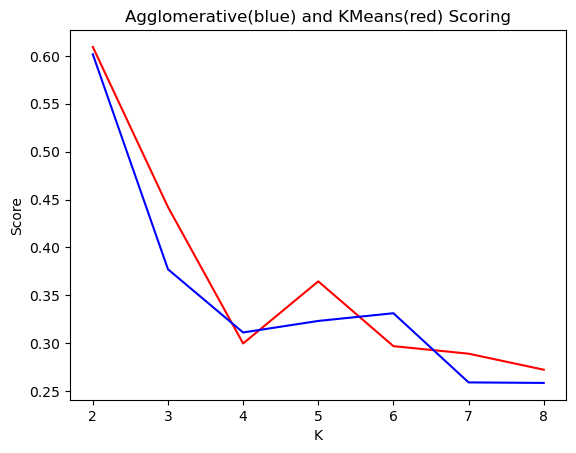

In [35]:
# score comparison graph
sns.lineplot(x = range(2,9), y = kmeans_scores, color = 'r')
sns.lineplot(x = range(2, 9), y = agglo_scores, color = 'b')
plt.title('Agglomerative(blue) and KMeans(red) Scoring')
plt.xlabel('K')
plt.ylabel('Score')

plt.show()

In [37]:
print('Max KMeans Score:', kmeans_scores[0])
print('Max Agglomerative Score:', agglo_scores[0])

Max KMeans Score: 0.6093532583644075
Max Agglomerative Score: 0.6016526265738218


Both models have a silhouette score above 0.5, meaning that they perform relatively well. Both models have similar cluster scoring, with the best performing model having k = 2. This seems rather intuitive, though as the clusters are likely grouped by safe and not safe. 

Max KMeans Score: 0.6093532583644075

Max Agglomerative Score: 0.6016526265738218

In [ ]:
# visualization of clusters function
def plot_clusters(cluster_frame, X, model_type_name):
    # decomposition for clustering 2D visualization
    # chooses to most important variables
    principle = PCA(n_components = 2)
    data_principle = principle.fit_transform(X)

    # frame of principle variables and mapped clusters to target variables 
    df_principle = pd.DataFrame(data_principle, columns = ['PC1', 'PC2'])
    df_principle['Disease'] = cluster_frame['Cluster To Disease']

    # plot clusters
    sns.scatterplot(data = df_principle, x = 'PC1', y = 'PC2', hue = 'Disease', palette = 'cool')
    plt.title(f'{model_type_name} Clustering of Dermatology Data')

    # general cluster areas
    for cluster in np.unique(df_principle['Disease']):
        cluster_data = df_principle[df_principle['Disease'] == cluster]
        ellipse = patches.Ellipse(cluster_data[['PC1', 'PC2']].mean().values,
                                  width = cluster_data['PC1'].std() * 4,
                                  height = cluster_data['PC2'].std() * 4,
                                  edgecolor = 'black', 
                                  facecolor = 'none', 
                                  linestyle = '--', 
                                  linewidth = 1)
        plt.gca().add_patch(ellipse)
    
    plt.show()

In [42]:
# visualization of clusters function
# takes cluster labels, data, and name of clustering fuction to plot resulting clusters 
def plot_clusters(labels, data, model_type_name):
    # decomposition for clustering 2D visualization
    # chooses to most important variables
    principle = PCA(n_components = 2)
    data_principle = principle.fit_transform(data)

    # frame of principle variables and mapped clusters to target variables 
    df_principle = pd.DataFrame(data_principle, columns = ['PC1', 'PC2'])
    df_principle['Label'] = labels

    # plot clusters
    sns.scatterplot(data = df_principle, x = 'PC1', y = 'PC2', hue = 'Label', palette = 'cool')
    plt.title(f'{model_type_name} Clustering of Airline Safety Data')

    # general cluster areas
    for cluster in np.unique(df_principle['Label']):
        cluster_data = df_principle[df_principle['Label'] == cluster]
        ellipse = patches.Ellipse(cluster_data[['PC1', 'PC2']].mean().values,
                                  width = cluster_data['PC1'].std() * 4,
                                  height = cluster_data['PC2'].std() * 4,
                                  edgecolor = 'black', 
                                  facecolor = 'none', 
                                  linestyle = '--', 
                                  linewidth = 1)
        plt.gca().add_patch(ellipse)
    
    plt.show()

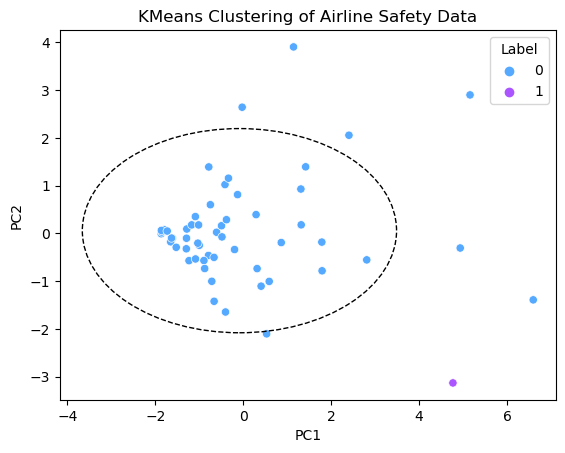

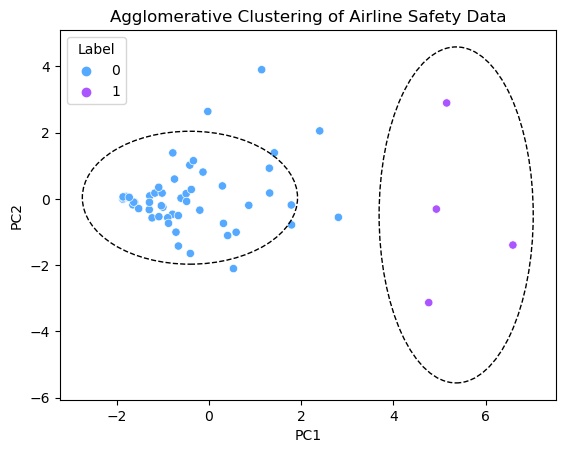

In [44]:
kmeans_best = kmeans_fits[0]
agglo_best = agglo_fits[0]

plot_clusters(kmeans_best.labels_, data_scaled, 'KMeans')
plot_clusters(agglo_best.labels_, data_scaled, 'Agglomerative')

#### Clustering Results

As show with with the scoring results, both models perform relatively simialar in terms of cluster quality. Because of model clustering methods and model scoring, the clusters are also slightly different. KMeans only labels 1 airline in the 'dangerous' category whereas Agglomerative labels 4. 

In [48]:
safety = df.copy()
safety['Cluster K'] = kmeans_best.labels_
safety['Cluster A'] = agglo_best.labels_

In [63]:
for cluster in safety['Cluster K'].unique():
    k = set(safety[safety['Cluster K'] == cluster]['airline'])
    a = set(safety[safety['Cluster A'] == cluster]['airline'])

    inter = k.intersection(a)

    print('Kmeans Cluster:', cluster)
    print(k)
    print()
    print('Agglomerative Cluster:', cluster)
    print(a)
    print()
    print('Intersection of Clusters:')
    print(inter)

Kmeans Cluster: 0
{'Ethiopian Airlines', 'Aeromexico*', 'US Airways / America West*', 'Saudi Arabian', 'Lufthansa*', 'TAM', 'Xiamen Airlines', 'All Nippon Airways', 'Egyptair', 'Southwest Airlines', 'South African', 'Kenya Airways', 'Air India*', 'TACA', 'Pakistan International', 'Turkish Airlines', 'Alitalia', 'Air New Zealand*', 'LAN Airlines', 'SWISS*', 'Austrian Airlines', 'Air France', 'Finnair', 'Philippine Airlines', 'Garuda Indonesia', 'El Al', 'KLM*', 'Hawaiian Airlines', 'American*', 'Delta / Northwest*', 'Aerolineas Argentinas', 'SAS*', 'Cathay Pacific*', 'Japan Airlines', 'British Airways*', 'Condor', 'TAP - Air Portugal', 'Thai Airways', 'Alaska Airlines*', 'Singapore Airlines', 'Qantas*', 'Iberia', 'Royal Air Maroc', 'Virgin Atlantic', 'Gulf Air', 'China Airlines', 'United / Continental*', 'Air Canada', 'Korean Air', 'Sri Lankan / AirLanka', 'Aer Lingus', 'COPA', 'Malaysia Airlines', 'Vietnam Airlines', 'Avianca'}

Agglomerative Cluster: 0
{'Ethiopian Airlines', 'Aeromexi

### Final Results:
Both clustering methods agree that Aeroflot is the 'most dangerous' airline given the available data.


In [52]:
# average safety metrics by kmeans cluster
safety_metrics1 = safety.groupby('Cluster K').agg({
    'incidents_85_99': 'mean',
    'fatal_accidents_85_99': 'mean',
    'fatalities_85_99': 'mean',
    'incidents_00_14': 'mean',
    'fatal_accidents_00_14': 'mean',
    'fatalities_00_14': 'mean'
}).reset_index()

safety_metrics1['incidents_mean'] = (safety_metrics1['incidents_85_99'] + safety_metrics1['incidents_00_14']) / 2
safety_metrics1['fatal_mean'] = (safety_metrics1['fatal_accidents_85_99'] + safety_metrics1['fatal_accidents_00_14']) / 2
safety_metrics1['fatalities_mean'] = (safety_metrics1['fatalities_85_99'] + safety_metrics1['fatalities_00_14']) / 2

safety_metrics1

,Cluster K,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_mean,fatal_mean,fatalities_mean
0,0,5.927273,1.963636,112.127273,4.090909,0.654545,54.927273,5.009091,1.309091,83.527273
1,1,76.000000,14.000000,128.000000,6.000000,1.000000,88.000000,41.000000,7.500000,108.000000


In [54]:
# average safety metrics by kmeans cluster
safety_metrics2 = safety.groupby('Cluster A').agg({
    'incidents_85_99': 'mean',
    'fatal_accidents_85_99': 'mean',
    'fatalities_85_99': 'mean',
    'incidents_00_14': 'mean',
    'fatal_accidents_00_14': 'mean',
    'fatalities_00_14': 'mean'
}).reset_index()

safety_metrics2['incidents_mean'] = (safety_metrics2['incidents_85_99'] + safety_metrics2['incidents_00_14']) / 2
safety_metrics2['fatal_mean'] = (safety_metrics2['fatal_accidents_85_99'] + safety_metrics2['fatal_accidents_00_14']) / 2
safety_metrics2['fatalities_mean'] = (safety_metrics2['fatalities_85_99'] + safety_metrics2['fatalities_00_14']) / 2

safety_metrics2

,Cluster A,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_mean,fatal_mean,fatalities_mean
0,0,5.038462,1.596154,102.692308,3.269231,0.557692,47.019231,4.153846,1.076923,74.855769
1,1,35.000000,9.750000,238.750000,15.250000,2.000000,166.000000,25.125000,5.875000,202.375000
